In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
# storing file path as file
file = './Apprentice_Chef_Dataset.xlsx'

# creating dataset using the file path
ac_dataset = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# changing all column names to lowercase
ac_dataset.columns = ac_dataset.columns.str.lower()

# checking information of all columns
ac_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   revenue                      1946 non-null   float64
 1   cross_sell_success           1946 non-null   int64  
 2   name                         1946 non-null   object 
 3   email                        1946 non-null   object 
 4   first_name                   1946 non-null   object 
 5   family_name                  1899 non-null   object 
 6   total_meals_ordered          1946 non-null   int64  
 7   unique_meals_purch           1946 non-null   int64  
 8   contacts_w_customer_service  1946 non-null   int64  
 9   product_categories_viewed    1946 non-null   int64  
 10  avg_time_per_site_visit      1946 non-null   float64
 11  mobile_number                1946 non-null   int64  
 12  cancellations_before_noon    1946 non-null   int64  
 13  cancellations_afte

In [4]:
# viewing first five rows of dataset
ac_dataset.head(n = 5)

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [5]:
ac_dataset.describe(include = 'all')

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed
count,1946.000000,1946.000000,1946,1946,1946,1899,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
unique,NaN,NaN,1946,1946,1442,1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Dacey Mormont,betharios.of.braavos@protonmail.com,Jon,Frey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,21,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2107.292652,0.678828,NaN,NaN,NaN,NaN,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,NaN,NaN,NaN,NaN,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,NaN,NaN,NaN,NaN,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,NaN,NaN,NaN,NaN,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,NaN,NaN,NaN,NaN,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,NaN,NaN,NaN,NaN,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000


In [6]:
# checking if any columns have missing values 
ac_dataset.isnull().sum()

revenue                         0
cross_sell_success              0
name                            0
email                           0
first_name                      0
family_name                    47
total_meals_ordered             0
unique_meals_purch              0
contacts_w_customer_service     0
product_categories_viewed       0
avg_time_per_site_visit         0
mobile_number                   0
cancellations_before_noon       0
cancellations_after_noon        0
tastes_and_preferences          0
pc_logins                       0
mobile_logins                   0
weekly_plan                     0
early_deliveries                0
late_deliveries                 0
package_locker                  0
refrigerated_locker             0
avg_prep_vid_time               0
largest_order_size              0
master_classes_attended         0
median_meal_rating              0
avg_clicks_per_visit            0
total_photos_viewed             0
dtype: int64

In [7]:
# showing the rows with null values in column family_name
ac_dataset[ac_dataset['family_name'].isnull()].head(n = 5)

# The family_name probably didn't get taken because they are in brackets
# Nothing interesting of note can be found and family name does not affect our
# analysis

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed
20,2012.5,1,Bethany (Blushing Bethany),bethany.(blushing.bethany)@mmm.com,Bethany,NaN,67,1,4,8,31.00,1,2,0,1,6,2,6,9,2,0,0,130.4,2,1,2,16,0
164,1890.0,1,Barth (brewer),barth.(brewer)@nike.com,Barth,NaN,120,6,10,4,48.71,0,0,1,1,5,1,10,4,5,0,0,122.8,3,1,3,14,0
224,1740.0,1,Erryk (guard),erryk.(guard)@nike.com,Erryk,NaN,49,2,8,10,103.60,1,2,0,1,6,1,0,0,3,1,0,128.4,3,0,3,13,0
298,1645.0,1,Mudge (brotherhood),mudge.(brotherhood)@aol.com,Mudge,NaN,14,1,12,7,64.00,1,0,0,1,6,1,0,0,0,0,0,87.6,3,1,3,14,0
307,1488.0,1,Lew (guard),lew.(guard)@jpmorgan.com,Lew,NaN,49,7,5,1,114.10,1,4,0,0,5,1,12,4,0,0,0,112.0,3,1,3,12,165


In [8]:
# dropping columns name, first_name, and family_name
ac_dataset = ac_dataset.drop(['name', 'first_name', 'family_name'], axis = 1)

In [9]:
# checking new dataset column names
ac_dataset.columns

Index(['revenue', 'cross_sell_success', 'email', 'total_meals_ordered', 'unique_meals_purch', 'contacts_w_customer_service', 'product_categories_viewed', 'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon', 'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins', 'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries', 'package_locker', 'refrigerated_locker', 'avg_prep_vid_time', 'largest_order_size', 'master_classes_attended', 'median_meal_rating', 'avg_clicks_per_visit', 'total_photos_viewed'], dtype='object')

In [10]:
# checking for any null values
ac_dataset.isnull().any().any()

False

**Looking into the continuous variables**

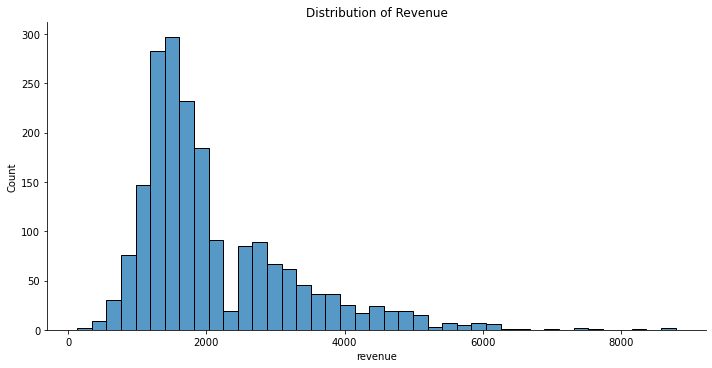

In [11]:
# displaying the plot for 'Mas Vnr Area'
sns.displot(x = 'revenue',
            data = ac_dataset,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution of Revenue')

# displaying the plot
plt.show()

Our response variable is skewed and has outliers. To fix this, we should should perform a log transformation to bring the values closer together.

In [12]:
# log transformation of revenue and saving as new column
ac_dataset['log_revenue'] = np.log10(ac_dataset['revenue'])

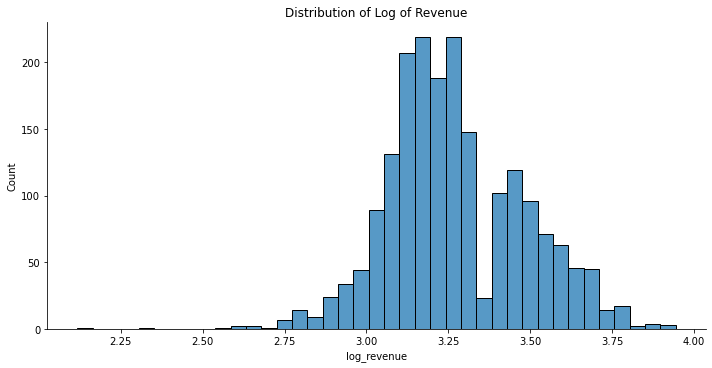

In [13]:
# displaying the plot for 'Mas Vnr Area'
sns.displot(x = 'log_revenue',
            data = ac_dataset,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution of Log of Revenue')

# displaying the plot
plt.show()

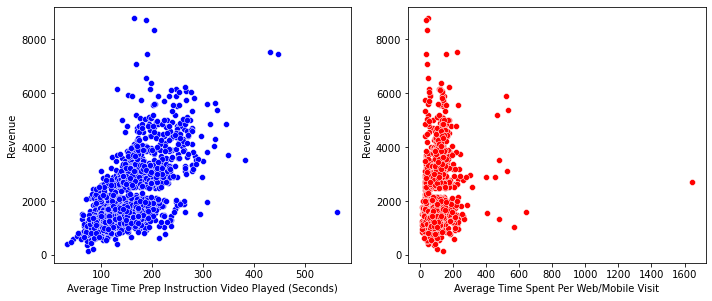

In [14]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = ac_dataset['avg_prep_vid_time'],
                y = ac_dataset['revenue'],
                color = 'b')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time Prep Instruction Video Played (Seconds)')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = ac_dataset['avg_time_per_site_visit'],
                y = ac_dataset['revenue'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time Spent Per Web/Mobile Visit')
plt.ylabel(ylabel = 'Revenue')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Housing Scatterplots.png')
plt.show()

In [15]:
# developing correlation matrix for continous variables
ac_cont_corr = ac_dataset.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
print(ac_cont_corr.loc['revenue',['avg_prep_vid_time', \
                                  'avg_time_per_site_visit']]\
      .sort_values(ascending = False))

avg_prep_vid_time          0.64
avg_time_per_site_visit    0.14
Name: revenue, dtype: float64


**Looking into the categorical variables**

In [16]:
cross_sell_success
email
package_locker
refrigerated_locker
tastes_and_preferences
mobile_number

NameError: name 'cross_sell_success' is not defined

In [17]:
# the marketing team is very adamant about email classification so emails need
# to be classsified as requested

# creating lists for different categories
prof_email = ['mmm', 'amex', 'apple', 'boeing', 'caterpillar', 'chevron',
             'cisco', 'cocacola', 'disney', 'dupont', 'exxon', 'ge', 'walmart'
             'goldmansacs', 'homedepot', 'ibm', 'intel', 'jnj', 'jpmorgan',
             'mcdonalds', 'merck', 'microsoft', 'nike', 'pfizer', 'pg',
             'travelers', 'unitedtech', 'unitedhealth', 'verizon', 'visa']
per_email = ['gmail', 'yahoo', 'protonmail']
junk_email = ['me', 'aol', 'hotmail', 'live', 'msn', 'passport']

ac_dataset['email_category'] = '0'

for index, email in ac_dataset[['email']].iterrows():
    domain_name = re.findall('@+\S+[.com|.org]', email[0])[0]
    for pattern in ['@', '.', 'com', 'org']:
        domain_name = domain_name.replace(pattern, '')
    if domain_name in prof_email:
        ac_dataset.loc[index, 'email_category'] = 'Professional'
    elif domain_name in per_email:
        ac_dataset.loc[index, 'email_category'] = 'Personal'
    elif domain_name in junk_email:
        ac_dataset.loc[index, 'email_category'] = 'Junk'
    else:
        ac_dataset.loc[index, 'email_category'] = 'Undefined'

In [19]:
ac_dataset['email_category'].value_counts()

Personal        861
Professional    638
Junk            389
Undefined        58
Name: email_category, dtype: int64

In [20]:
ac_dataset[ac_dataset['email_category'] == 'Undefined']

,revenue,cross_sell_success,email,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,email_category
42,854.00,1,garrett.paege@jpmorgan.com,12,6,11,6,12.80,1,0,0,1,5,1,18,0,2,0,0,98.7,2,0,2,16,232,2.931458,Undefined
118,850.00,0,gascoyne@goldmansacs.com,15,7,11,2,101.59,1,0,1,1,5,1,13,7,4,0,0,75.6,2,0,3,13,0,2.929419,Undefined
122,1440.00,0,haggon@goldmansacs.com,69,3,7,2,231.30,1,1,1,0,6,1,0,0,1,1,0,105.6,2,0,3,12,0,3.158362,Undefined
154,1923.00,1,aegon.v.targaryen@goldmansacs.com,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,135.3,3,1,3,13,253,3.283979,Undefined
193,1485.75,1,henk@goldmansacs.com,15,1,11,2,86.77,1,1,0,1,5,2,14,0,1,1,1,64.0,3,0,2,17,0,3.171946,Undefined
225,1792.00,1,gariss@walmart.com,68,3,5,10,78.12,1,2,0,1,6,1,24,0,3,0,0,157.5,3,0,3,14,0,3.253338,Undefined
230,1095.00,1,harwin@walmart.com,31,9,6,8,61.30,0,6,0,1,6,2,8,0,4,0,0,78.4,3,0,1,17,0,3.039414,Undefined
242,1285.00,1,bearded.ben@jpmorgan.com,110,5,8,2,187.61,1,1,0,0,5,1,14,0,5,1,1,83.6,3,0,2,15,0,3.108903,Undefined
243,1780.00,1,benedar.belmore@jpmorgan.com,44,9,6,6,37.35,1,1,0,1,5,1,20,0,2,0,0,124.5,3,0,3,14,0,3.250420,Undefined
247,2633.75,1,bluetooth@walmart.com,42,1,4,4,34.00,1,0,0,0,6,1,5,0,10,0,0,104.0,3,0,3,13,0,3.420575,Undefined


In [21]:
for i in ac_dataset['email']:
    print(re.findall('@+\S+[.com|.org]', i))

['@unitedhealth.com']
['@ge.org']
['@jnj.com']
['@ge.org']
['@jnj.com']
['@protonmail.com']
['@mcdonalds.com']
['@travelers.com']
['@nike.com']
['@caterpillar.com']
['@gmail.com']
['@hotmail.com']
['@me.com']
['@passport.com']
['@cocacola.com']
['@aol.com']
['@protonmail.com']
['@gmail.com']
['@gmail.com']
['@mcdonalds.com']
['@mmm.com']
['@merck.com']
['@protonmail.com']
['@gmail.com']
['@protonmail.com']
['@gmail.com']
['@gmail.com']
['@protonmail.com']
['@yahoo.com']
['@intel.com']
['@amex.com']
['@gmail.com']
['@disney.com']
['@protonmail.com']
['@yahoo.com']
['@merck.com']
['@aol.com']
['@aol.com']
['@visa.com']
['@protonmail.com']
['@nike.com']
['@gmail.com']
['@jpmorgan.com']
['@cocacola.com']
['@passport.com']
['@yahoo.com']
['@protonmail.com']
['@protonmail.com']
['@ibm.com']
['@dupont.com']
['@protonmail.com']
['@live.com']
['@mcdonalds.com']
['@protonmail.com']
['@yahoo.com']
['@hotmail.com']
['@merck.com']
['@jnj.com']
['@protonmail.com']
['@gmail.com']
['@msn.com']
['@dupo

['@mcdonalds.com']
['@protonmail.com']
['@protonmail.com']
['@cocacola.com']
['@msn.com']
['@yahoo.com']
['@gmail.com']
['@mmm.com']
['@gmail.com']
['@protonmail.com']
['@jpmorgan.com']
['@caterpillar.com']
['@gmail.com']
['@yahoo.com']
['@msn.com']
['@gmail.com']
['@jnj.com']
['@gmail.com']
['@microsoft.com']
['@msn.com']
['@unitedtech.com']
['@yahoo.com']
['@unitedtech.com']
['@passport.com']
['@mmm.com']
['@hotmail.com']
['@me.com']
['@gmail.com']
['@passport.com']
['@live.com']
['@dupont.com']
['@live.com']
['@gmail.com']
['@amex.com']
['@visa.com']
['@cisco.com']
['@microsoft.com']
['@travelers.com']
['@gmail.com']
['@cocacola.com']
['@gmail.com']
['@mcdonalds.com']
['@ibm.com']
['@protonmail.com']
['@live.com']
['@passport.com']
['@yahoo.com']
['@aol.com']
['@pfizer.com']
['@unitedtech.com']
['@mcdonalds.com']
['@yahoo.com']
['@gmail.com']
['@gmail.com']
['@protonmail.com']
['@yahoo.com']
['@protonmail.com']
['@gmail.com']
['@dupont.com']
['@passport.com']
['@mcdonalds.com']
['@y